In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
%matplotlib inline

from data_preprocess import clean_text
from top_weight_tokens import get_top_frequency_n_gram,get_top_tfidf_n_gram

C:\Users\Siddhesh.Dosi\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
TEXT_COL = 'text'
TARGET_COL = 'sentiment'
LABELS = np.unique(data[TARGET_COL])

In [5]:
print(f'data shape => {data.shape}')
print(data.isna().sum())

data shape => (27481, 4)
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [6]:
data = data.dropna()

Distribution of sentiment column =>
neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64
neutral     0.404549
positive    0.312300
negative    0.283151
Name: sentiment, dtype: float64


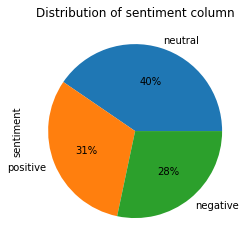

In [7]:
print(f'Distribution of {TARGET_COL} column =>')
print(data[TARGET_COL].value_counts())
print(data[TARGET_COL].value_counts(normalize=True))
#data[TARGET_COL].value_counts(normalize=True).plot(kind='bar',title=f'Distribution of {TARGET_COL} column')
data[TARGET_COL].value_counts().plot(kind='pie', autopct='%1.0f%%',title=f'Distribution of {TARGET_COL} column')
plt.show()

In [8]:
## Data Preprocess 
data['clean_text']=data[TEXT_COL].progress_apply(lambda x : clean_text(x))

100%|███████████████████████████████████████████████████████████████████████████| 27480/27480 [01:44<00:00, 261.79it/s]


In [9]:
data.head()

,textID,text,selected_text,sentiment,clean_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,bos bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,son couldnt put release already bought


In [10]:
pos = data[data[TARGET_COL]=='positive']
neg = data[data[TARGET_COL]=='negative']
neutral = data[data[TARGET_COL]=='neutral']

### Top Frequence unigram

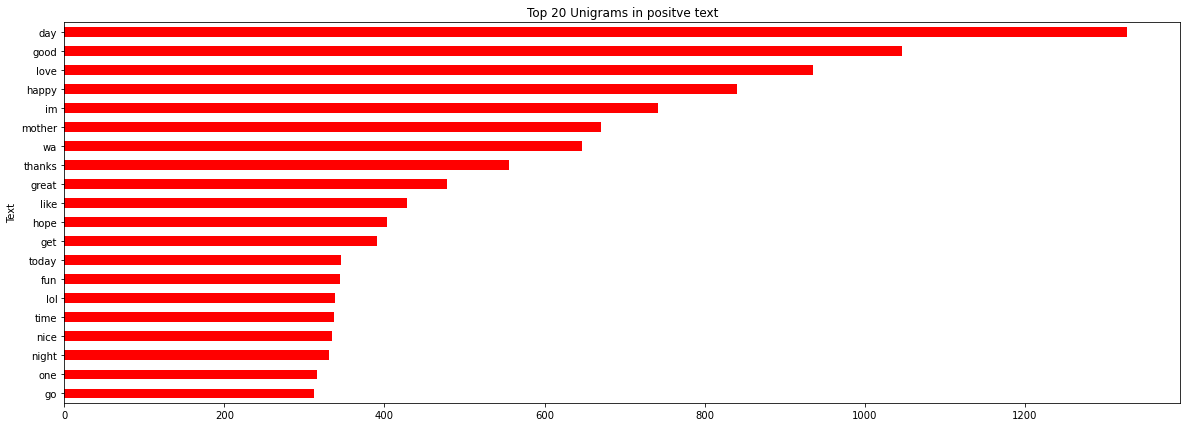

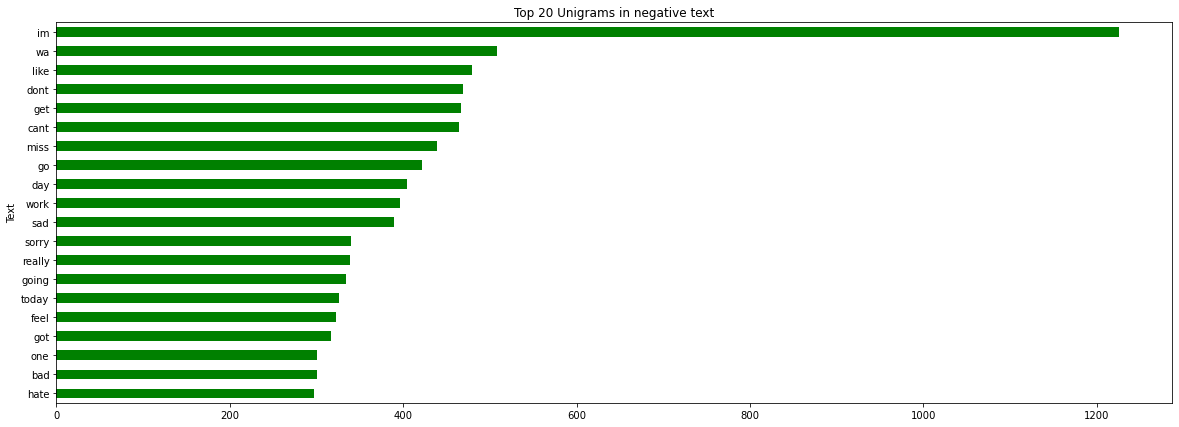

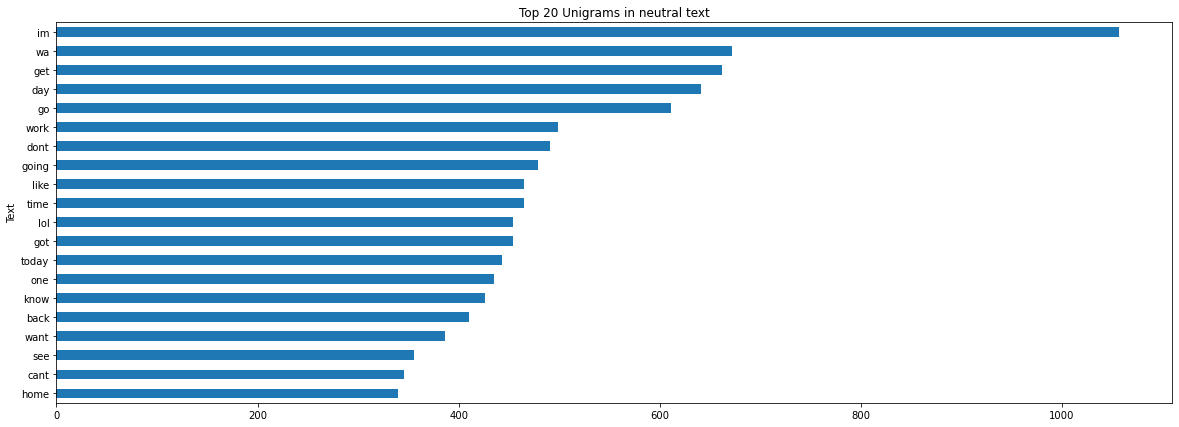

In [22]:
pos_unigrams = get_top_frequency_n_gram(pos['clean_text'],(1,1),20)
neg_unigrams = get_top_frequency_n_gram(neg['clean_text'],(1,1),20)
neutral_unigrams = get_top_frequency_n_gram(neutral['clean_text'],(1,1),20)

plt.rcParams["figure.figsize"] = (20,7)

df1 = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Unigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Unigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_unigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Unigrams in neutral text')

plt.show()

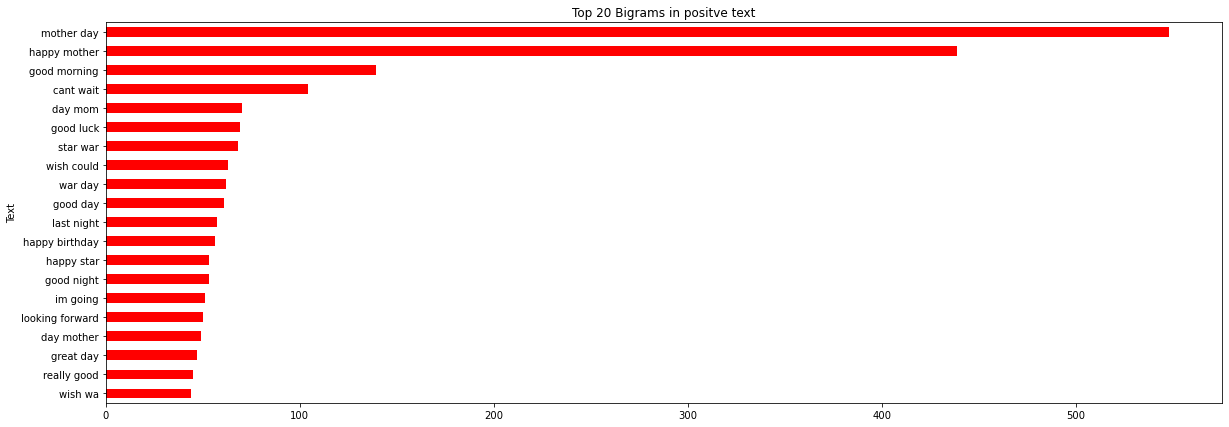

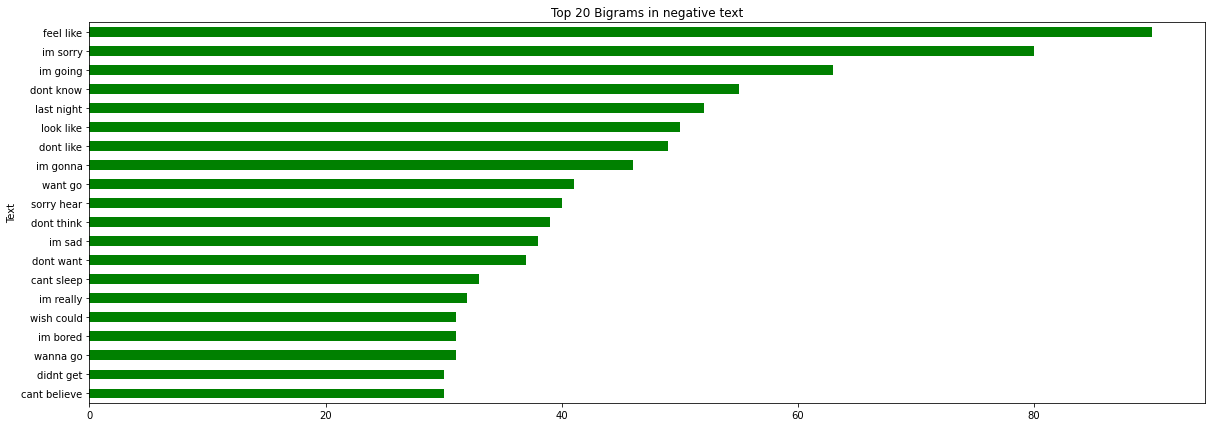

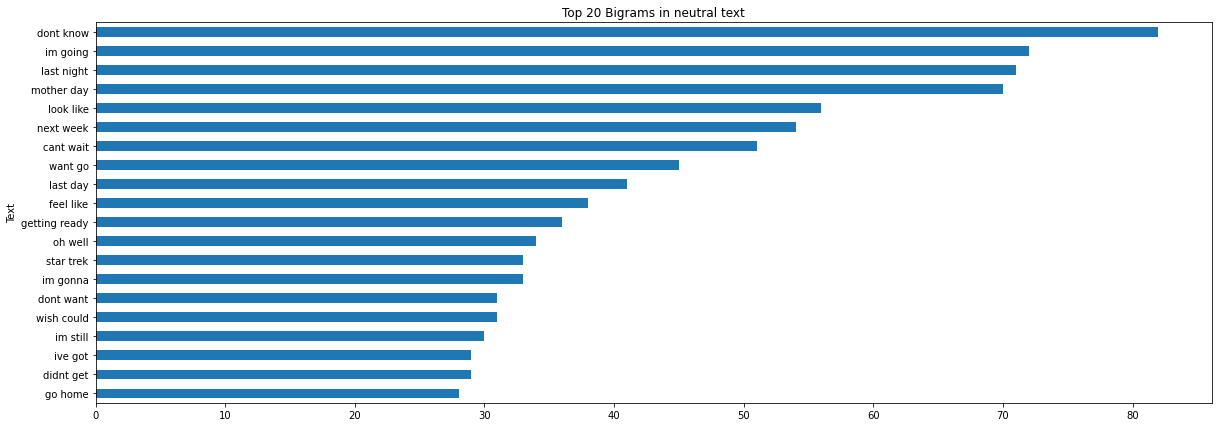

In [24]:
pos_bigrams = get_top_frequency_n_gram(pos['clean_text'],(2,2),20)
neg_bigrams = get_top_frequency_n_gram(neg['clean_text'],(2,2),20)
neutral_bigrams = get_top_frequency_n_gram(neutral['clean_text'],(2,2),20)

plt.rcParams["figure.figsize"] = (20,7)
df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Bigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Bigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Bigrams in neutral text')

plt.show()

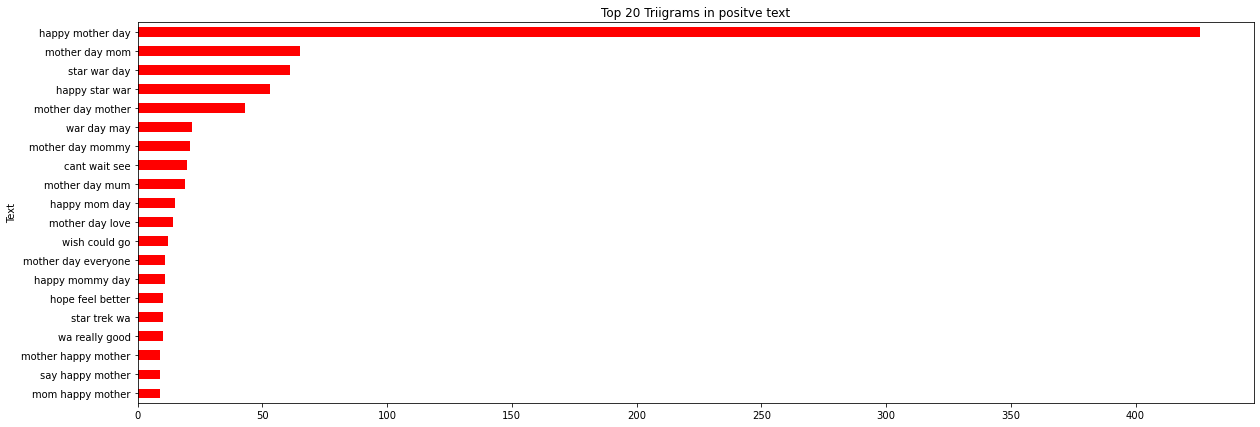

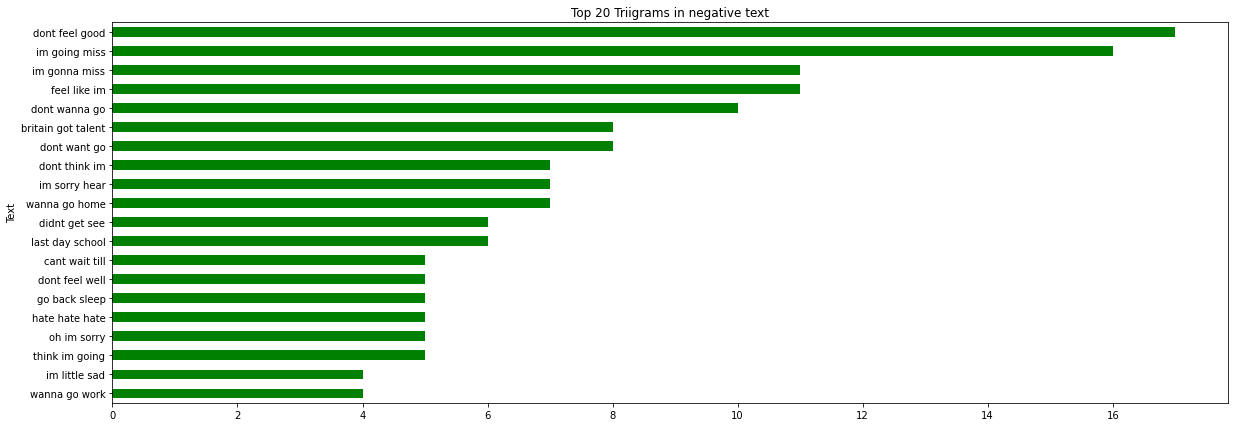

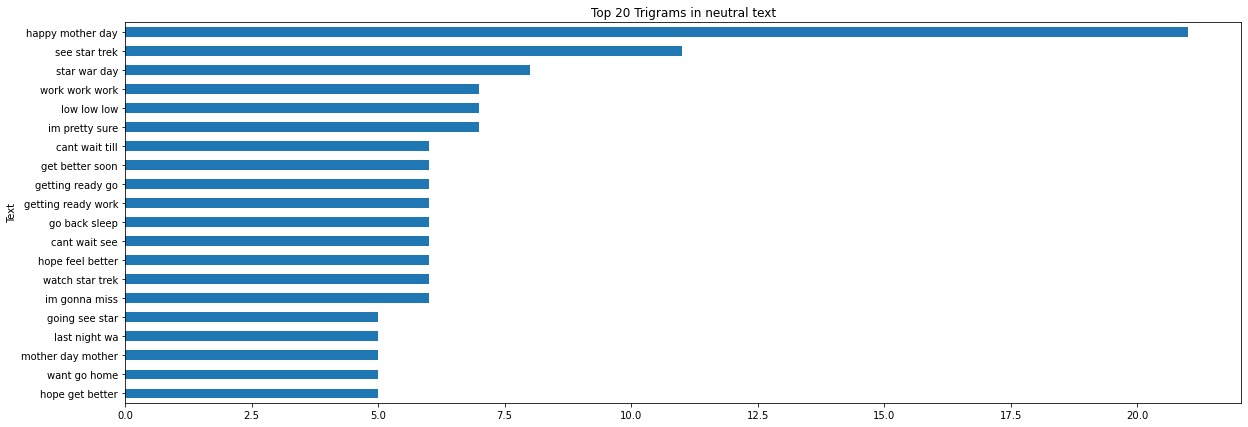

In [14]:

pos_trigrams = get_top_frequency_n_gram(pos['clean_text'],(3,3),20)
neg_trigrams = get_top_frequency_n_gram(neg['clean_text'],(3,3),20)
neutral_trigrams = get_top_frequency_n_gram(neutral['clean_text'],(3,3),20)

plt.rcParams["figure.figsize"] = (20,7)
df1 = pd.DataFrame(pos_trigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Triigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_trigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Triigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_trigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Trigrams in neutral text')

plt.show()

### Top Tfidf Tokens

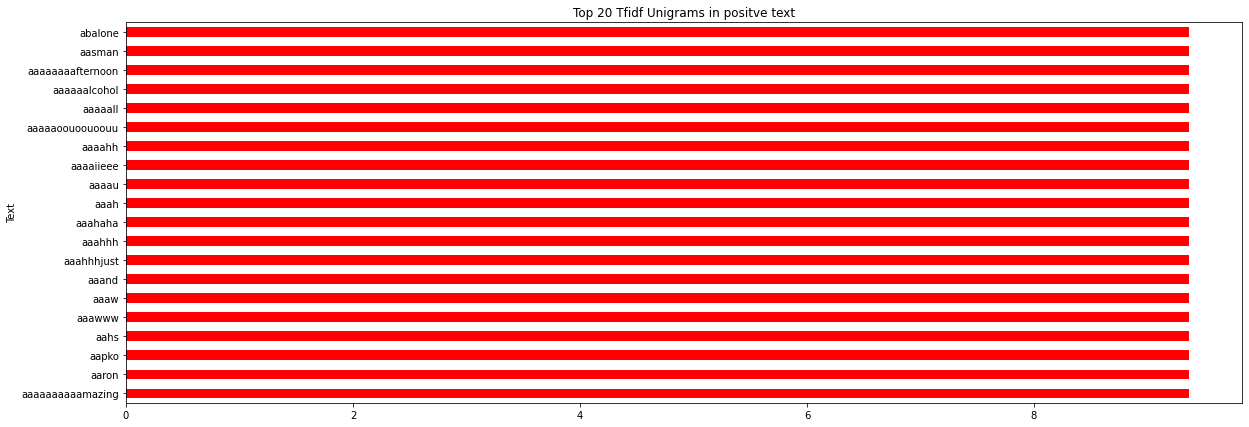

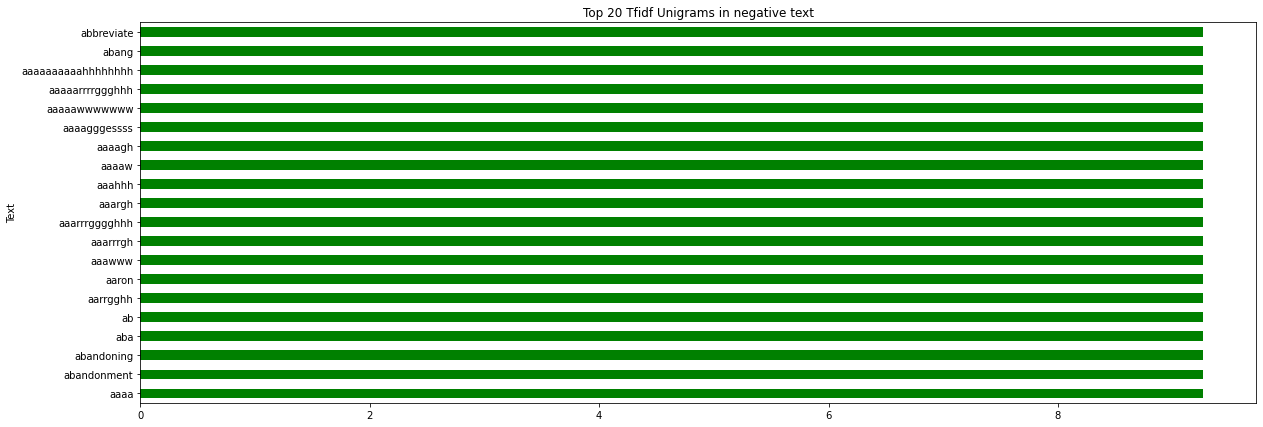

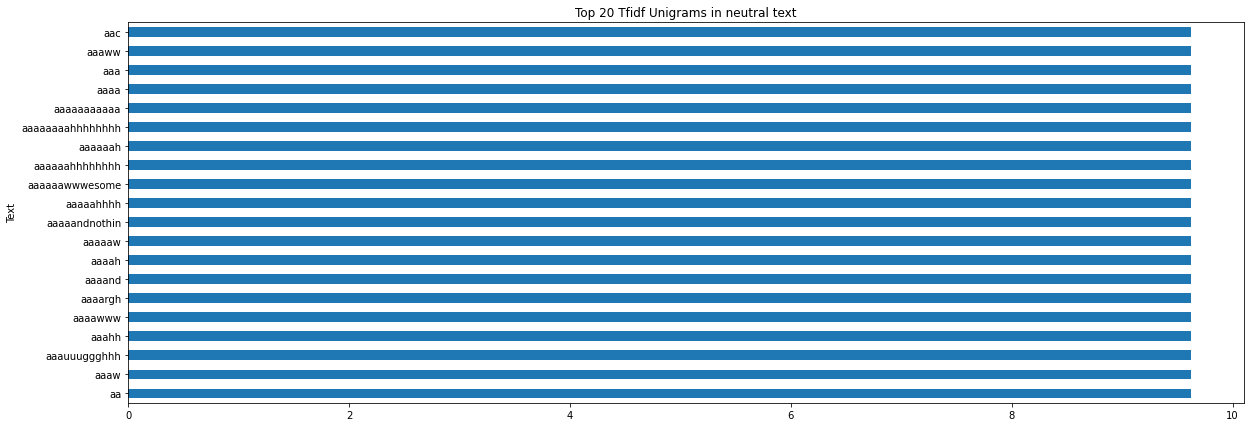

In [19]:
pos_unigrams = get_top_tfidf_n_gram(pos['clean_text'],(1,1),20)
neg_unigrams = get_top_tfidf_n_gram(neg['clean_text'],(1,1),20)
neutral_unigrams = get_top_tfidf_n_gram(neutral['clean_text'],(1,1),20)

plt.rcParams["figure.figsize"] = (20,7)

df1 = pd.DataFrame(pos_unigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Tfidf Unigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_unigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Tfidf Unigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_unigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Tfidf Unigrams in neutral text')

plt.show()

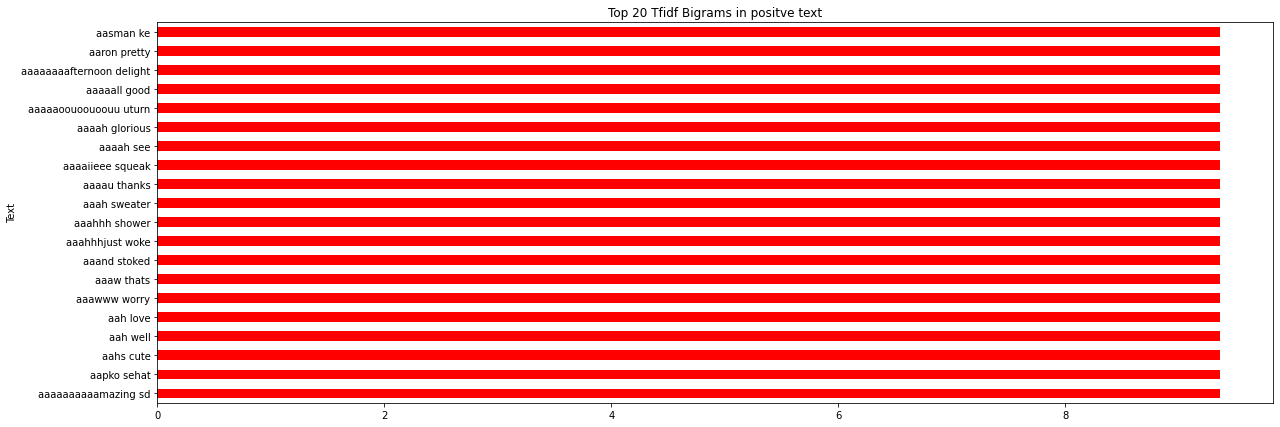

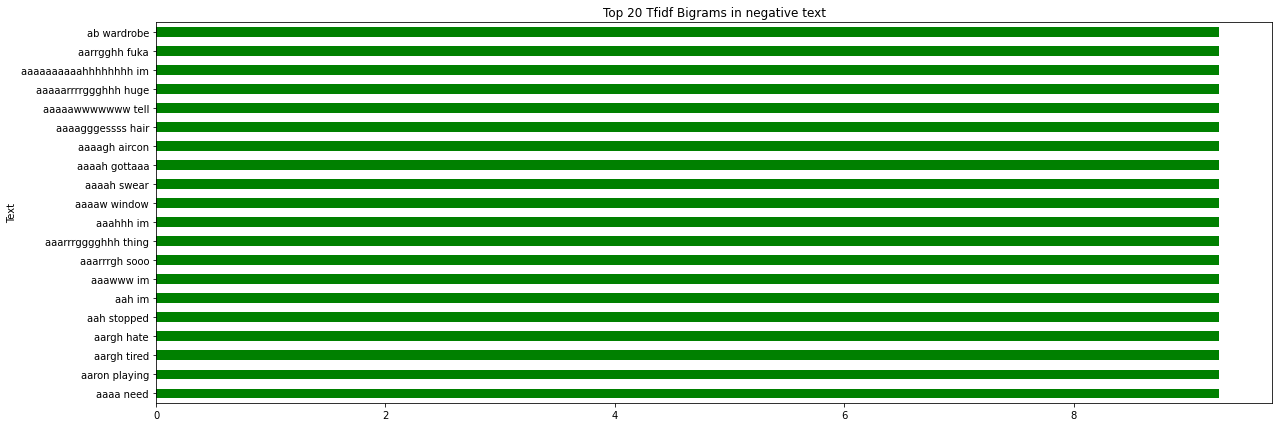

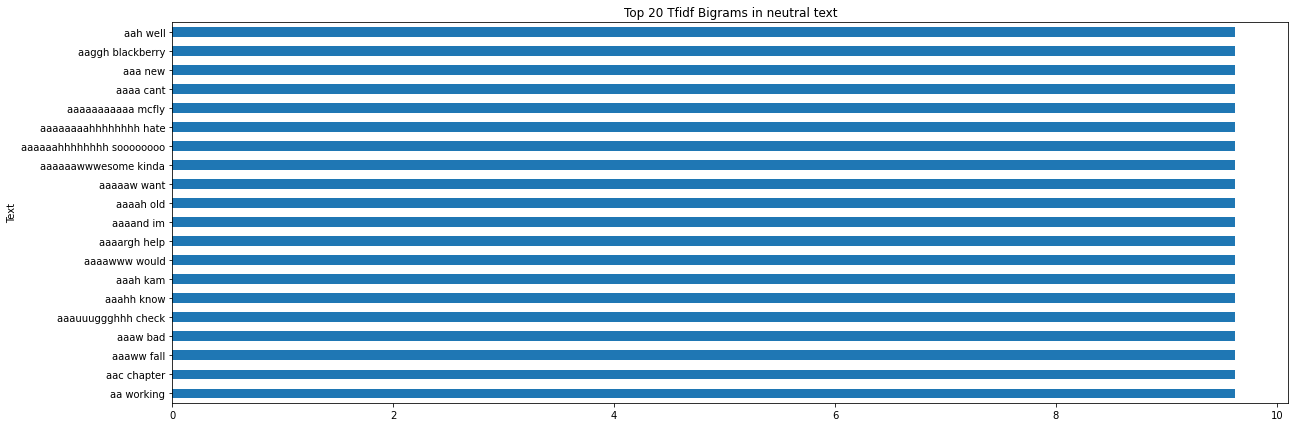

In [20]:
pos_bigrams = get_top_tfidf_n_gram(pos['clean_text'],(2,2),20)
neg_bigrams = get_top_tfidf_n_gram(neg['clean_text'],(2,2),20)
neutral_bigrams = get_top_tfidf_n_gram(neutral['clean_text'],(2,2),20)

plt.rcParams["figure.figsize"] = (20,7)
df1 = pd.DataFrame(pos_bigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Tfidf Bigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_bigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Tfidf Bigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_bigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Tfidf Bigrams in neutral text')

plt.show()

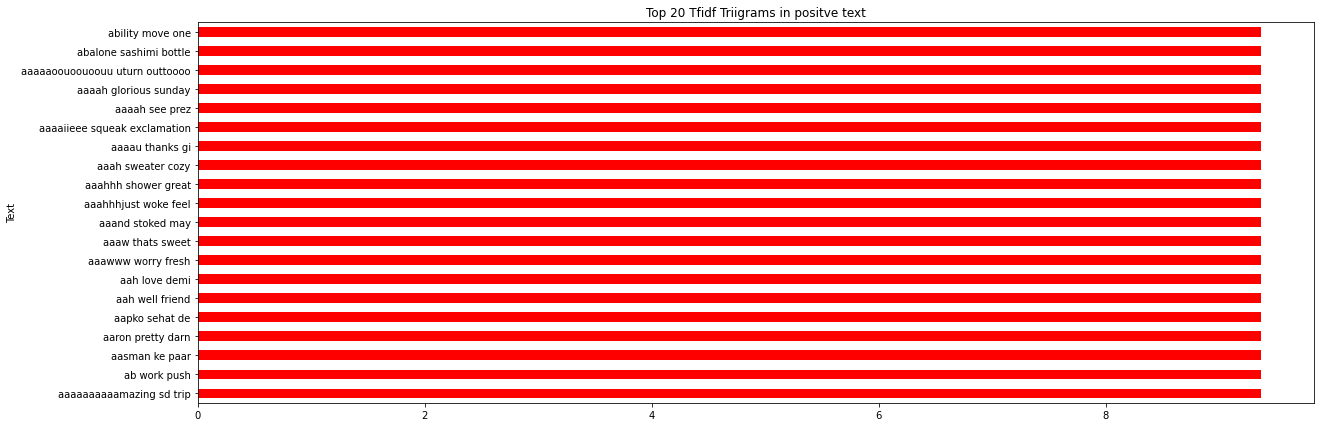

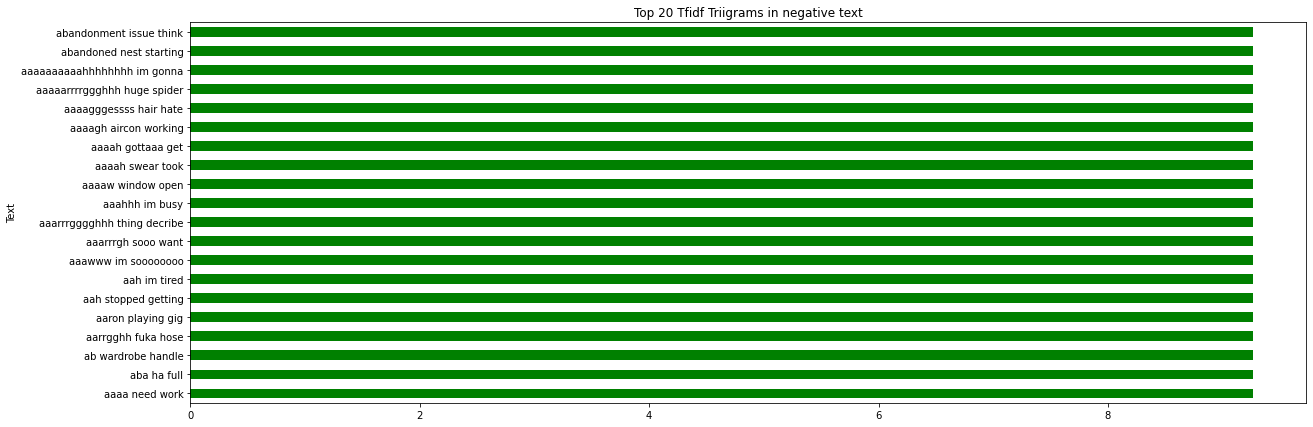

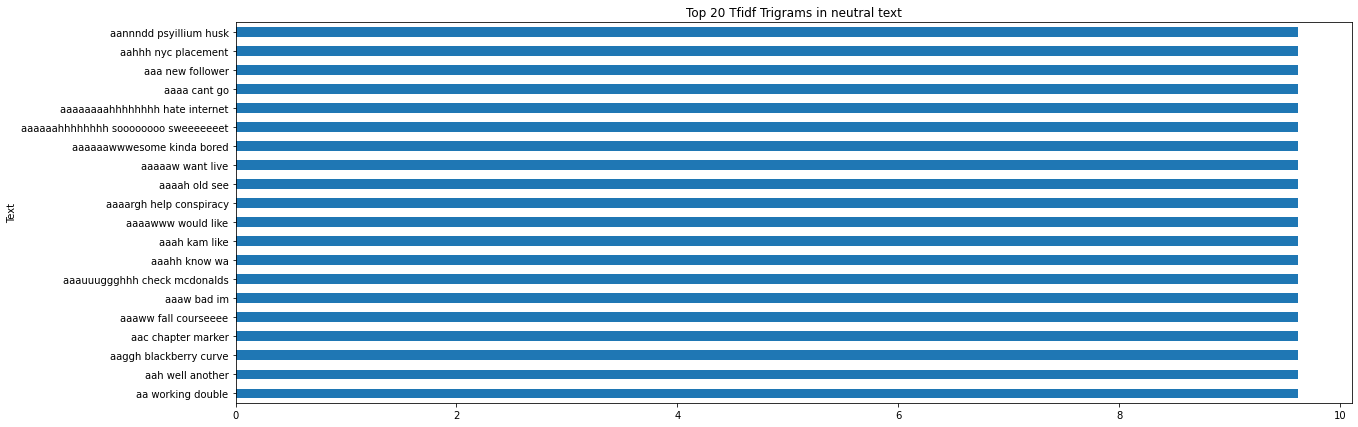

In [21]:
pos_trigrams = get_top_tfidf_n_gram(pos['clean_text'],(3,3),20)
neg_trigrams = get_top_tfidf_n_gram(neg['clean_text'],(3,3),20)
neutral_trigrams = get_top_tfidf_n_gram(neutral['clean_text'],(3,3),20)

plt.rcParams["figure.figsize"] = (20,7)
df1 = pd.DataFrame(pos_trigrams, columns = ['Text' , 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh',color='red', title='Top 20 Tfidf Triigrams in positve text')
plt.show()
df2 = pd.DataFrame(neg_trigrams, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', color='green',title='Top 20 Tfidf Triigrams in negative text')
plt.show()
df3 = pd.DataFrame(neutral_trigrams, columns = ['Text' , 'count'])
df3.groupby('Text').sum()['count'].sort_values(ascending=True).plot(
    kind='barh', title='Top 20 Tfidf Trigrams in neutral text')

plt.show()

### Word Cloud

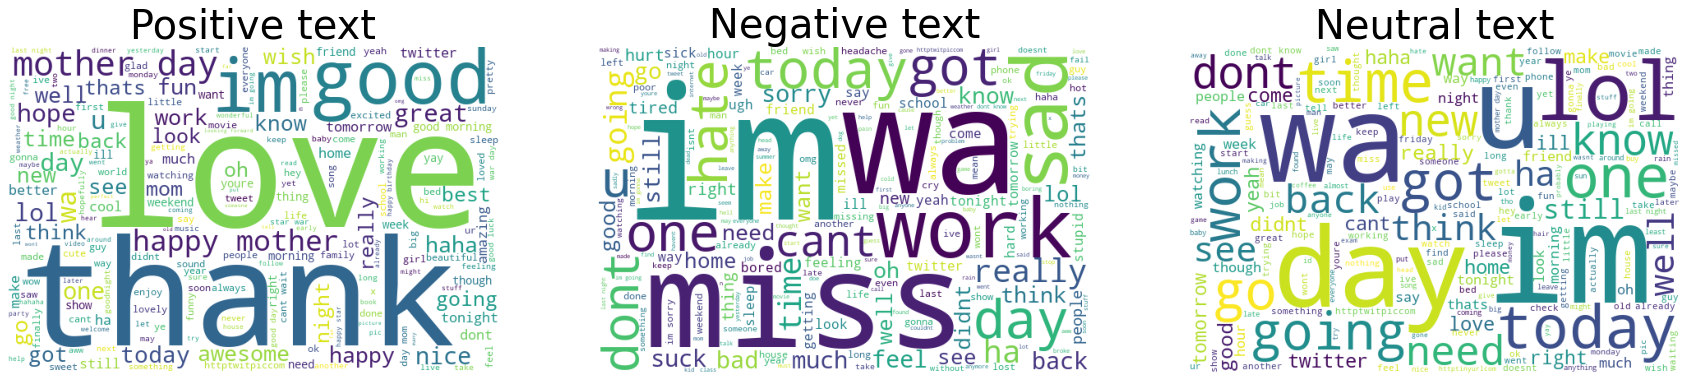

In [25]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(pos['clean_text'].tolist()))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neg['clean_text'].tolist()))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral['clean_text'].tolist()))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);